In [141]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [142]:
import os

files = os.listdir('.')
print(files)

['boat.jpg', 'Deriving_a_Gaussian_Prior_from_a_Generalized_Gamma_Hyperprior.pdf', 'fireworks_2025.png', 'grad1.JPG', 'grad2.JPG', 'grad3.JPG', 'grad_grayscale.jpg', 'grad_grayscale_inverted.jpg', 'horizontal_detail_LH.png', 'horizontal_detail_LH_inverted.png', 'horizontal_detail_LH_noisy.png', 'horizontal_detail_LH_noisy_inverted.png', 'image_creation.ipynb', 'learned_filters.ipynb', 'learned_filters_transform.ipynb', 'more_fireworks.png', 'santacruz_t.jpg', 'todo.md', 'usa.png']


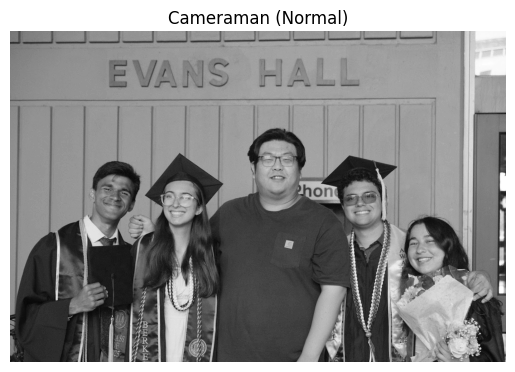

In [143]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
gray_img = np.array(Image.open("grad3.jpg").convert("L"))
plt.imshow(gray_img, cmap='gray')
plt.imsave('grad_grayscale.jpg', gray_img, cmap='gray')
plt.title('Cameraman (Normal)')
plt.axis('off')
plt.show()

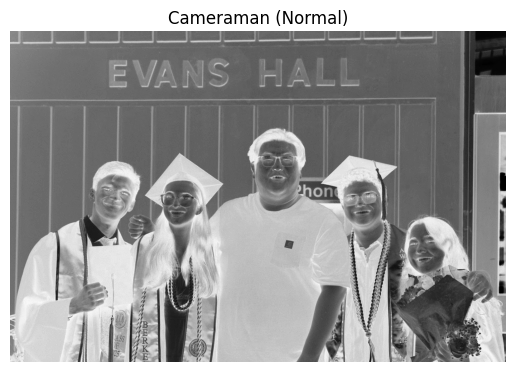

In [144]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
gray_img = 255 - np.array(Image.open("grad3.jpg").convert("L"))
plt.imshow(gray_img, cmap='gray')
plt.imsave('grad_grayscale_inverted.jpg', gray_img, cmap='gray')
plt.title('Cameraman (Normal)')
plt.axis('off')
plt.show()

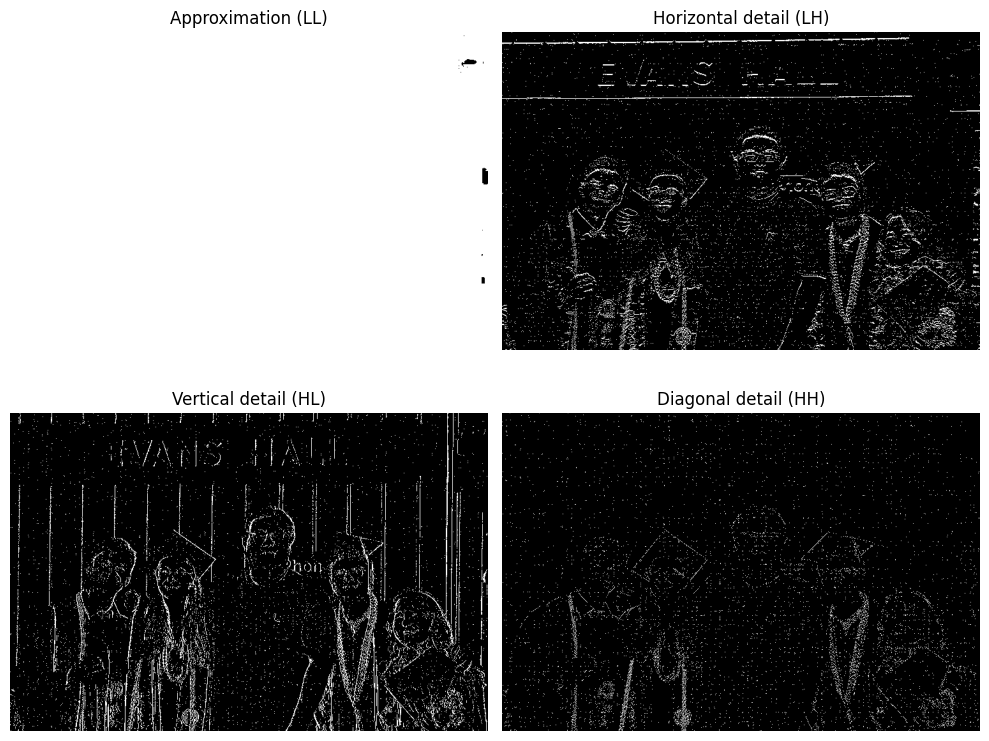

In [145]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
#gray_img = data.camera()

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Binarize the coefficients: values > 0 become 1, else 0
threshold = 10
LL = (LL > threshold).astype(int)
LH = (LH > threshold).astype(int)
HL = (HL > threshold).astype(int)
HH = (HH > threshold).astype(int)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal detail (LH)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical detail (HL)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal detail (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.imsave('horizontal_detail_LH.png', LH, cmap='gray')

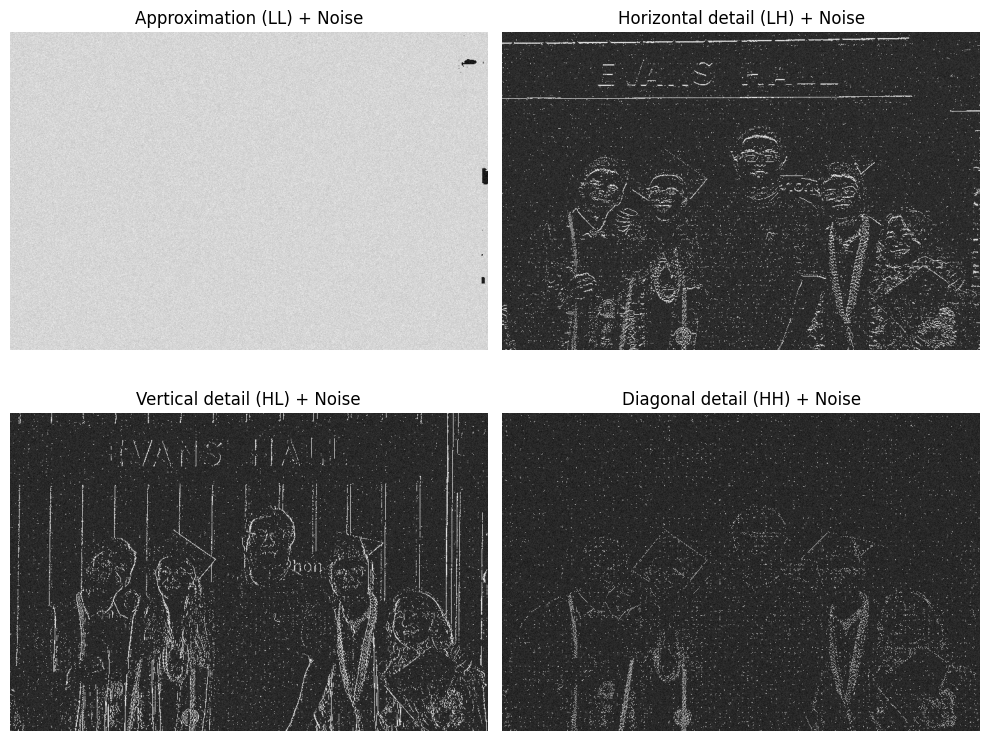

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
# gray_img = data.camera()

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img, 'haar')
LL, (LH, HL, HH) = coeffs2

LL = (LL > threshold).astype(int)
LH = (LH > threshold).astype(int)
HL = (HL > threshold).astype(int)
HH = (HH > threshold).astype(int) 

# Add random Gaussian noise to all wavelet subbands
noise_level = 0.05  # adjust as needed


LL_noisy = LL + np.random.normal(0, noise_level, LL.shape)
LH_noisy = LH + np.random.normal(0, noise_level, LH.shape)
HL_noisy = HL + np.random.normal(0, noise_level, HL.shape)
HH_noisy = HH + np.random.normal(0, noise_level, HH.shape)

# Display the noisy wavelet components
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL_noisy, cmap='gray')
plt.title('Approximation (LL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH_noisy, cmap='gray')
plt.title('Horizontal detail (LH) + Noise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL_noisy, cmap='gray')
plt.title('Vertical detail (HL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH_noisy, cmap='gray')
plt.title('Diagonal detail (HH) + Noise')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('horizontal_detail_LH_noisy.png', LH_noisy, cmap='gray')

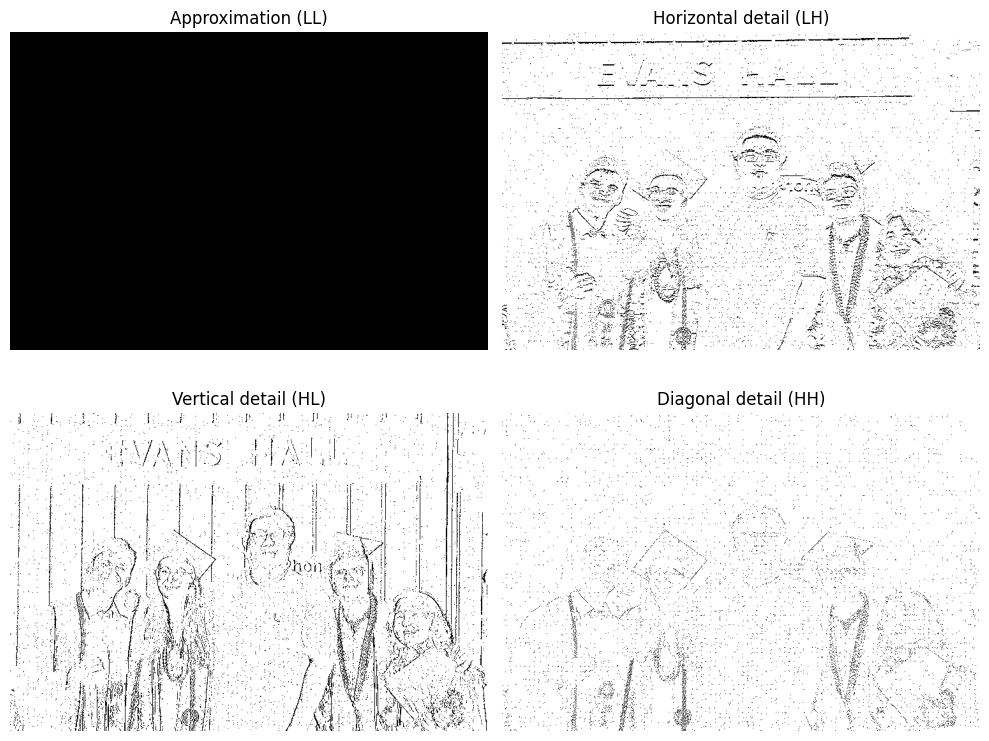

In [147]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
# gray_img = data.camera()
gray_img = 255 - gray_img

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img, 'haar')
LL, (LH, HL, HH) = coeffs2

threshold = -threshold
LL = (LL > threshold).astype(int)
LH = (LH > threshold).astype(int)
HL = (HL > threshold).astype(int)
HH = (HH > threshold).astype(int) 

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal detail (LH)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical detail (HL)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal detail (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('horizontal_detail_LH_inverted.png', LH, cmap='gray')

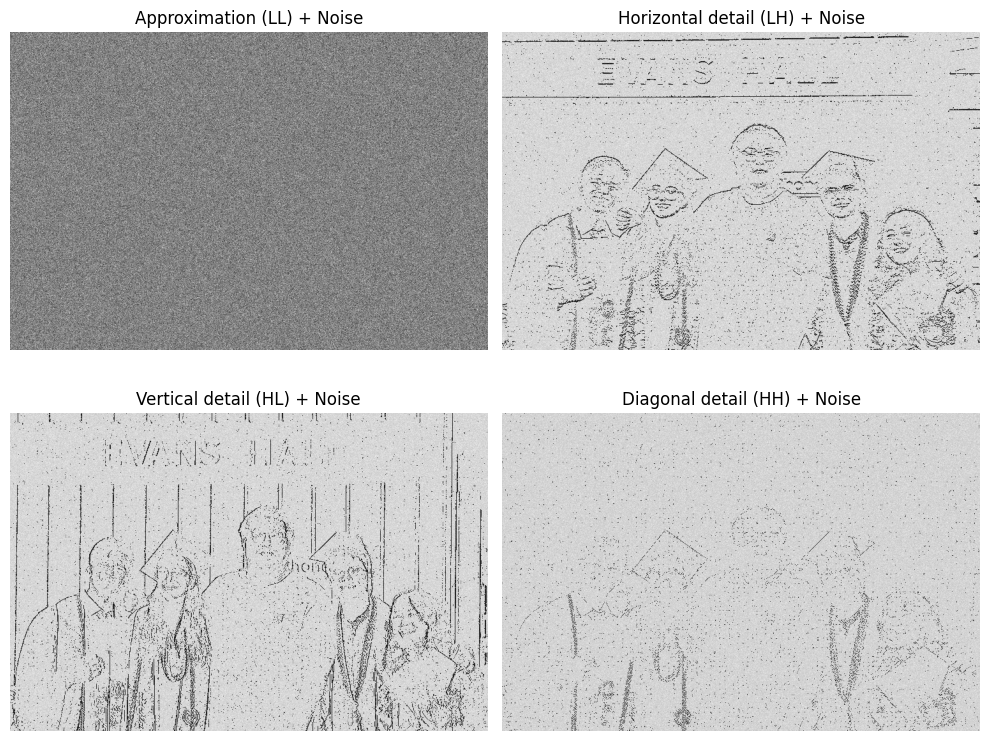

In [148]:

import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
# gray_img = data.camera()
gray_img = 255 - gray_img

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img, 'haar')
LL, (LH, HL, HH) = coeffs2

threshold = -10
LL = (LL > threshold).astype(int)
LH = (LH > threshold).astype(int)
HL = (HL > threshold).astype(int)
HH = (HH > threshold).astype(int) 

# Add random Gaussian noise to all wavelet subbands
noise_level = 0.05  # adjust as needed
LL_noisy = LL + np.random.normal(0, noise_level, LL.shape)
LH_noisy = LH + np.random.normal(0, noise_level, LH.shape)
HL_noisy = HL + np.random.normal(0, noise_level, HL.shape)
HH_noisy = HH + np.random.normal(0, noise_level, HH.shape)

# Display the noisy wavelet components
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL_noisy, cmap='gray')
plt.title('Approximation (LL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH_noisy, cmap='gray')
plt.title('Horizontal detail (LH) + Noise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL_noisy, cmap='gray')
plt.title('Vertical detail (HL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH_noisy, cmap='gray')
plt.title('Diagonal detail (HH) + Noise')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('horizontal_detail_LH_noisy_inverted.png', LH_noisy, cmap='gray')
